# ws 01
- no need to download IMDb dataset
- but, if you want to see the db, just click - https://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense

from keras.datasets import imdb
np.__version__ 

'1.26.4'

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 53s 3us/step


In [3]:
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [4]:
print(y_train[:15])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0]


In [5]:
X_train.shape

(25000,)

In [6]:
X_test.shape

(25000,)

In [7]:
y_train.shape

(25000,)

In [8]:
cls, count = np.unique(y_train, return_counts=True)
print(cls)
print(count)

[0 1]
[12500 12500]


In [9]:
cls, count = np.unique(y_test, return_counts=True)
print(cls)
print(count)

[0 1]
[12500 12500]


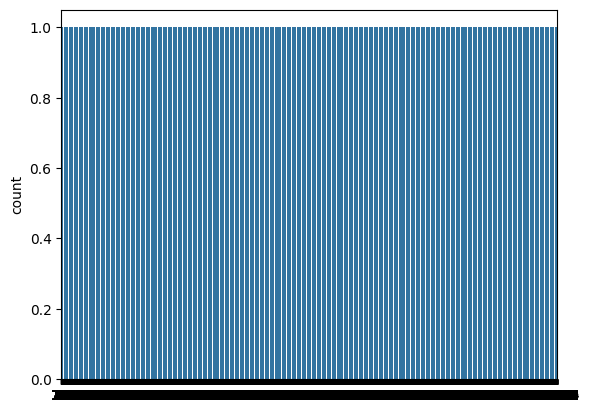

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y_train)

plt.show()
del sns

In [11]:
y_train[:15]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [12]:
X_train[0][:15]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]

In [13]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [14]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 

decoded = " ".join([reverse_index.get(i - 3, "#") for i in X_train[0]] )

decoded

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


"# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [15]:
data = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))


sents_len = [len(i) for i in data]
print("Average Review length:", np.mean(sents_len))
print("Standard Deviation:", round(np.std(sents_len)))
print('Min length:', np.min(sents_len))
print('Max length:', np.max(sents_len))

Categories: [0 1]
Number of unique words: 88585
Average Review length: 234.75892
Standard Deviation: 173
Min length: 7
Max length: 2494


In [16]:
import pandas as pd

df = pd.DataFrame(sents_len, columns=['words'])
# df.head()
df.describe().round(2)

,words
count,50000.00
mean,234.76
std,172.91
min,7.00
25%,129.00
50%,176.00
75%,285.00
max,2494.00


array([[<Axes: title={'center': 'words'}>]], dtype=object)

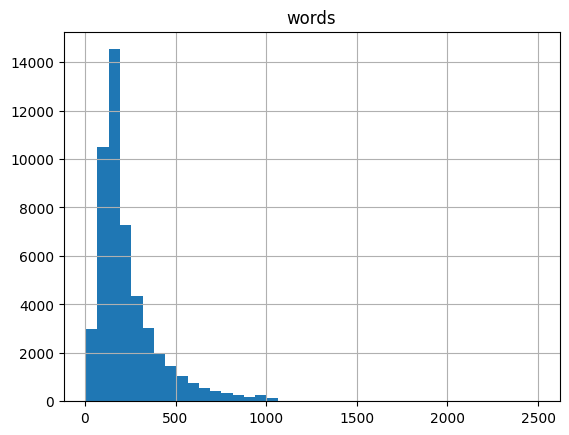

In [17]:
import matplotlib.pyplot as plt
df.hist(bins=40)

Prepare

In [18]:
max_len = 250 

X_train = pad_sequences(X_train, truncating='post', padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, truncating='post', padding='post', maxlen=max_len)

X_train[0].shape

(250,)

 model

In [19]:
X_train.shape

(25000, 250)

In [20]:
vocab_len = 90000
embed_size = 100 


model=Sequential()
model.add(Embedding(vocab_len, embed_size, input_shape=(X_train.shape[1],)))

model.add(Bidirectional(GRU(units=128, activation='tanh')))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 100)       │     9,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       176,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,176,897 (35.01 MB)

 Trainable params: 9,176,897 (35.01 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 144s 722ms/step - accuracy: 0.6011 - loss: 0.6450 - val_accuracy: 0.8077 - val_loss: 0.4288
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 134s 683ms/step - accuracy: 0.8717 - loss: 0.3179 - val_accuracy: 0.8141 - val_loss: 0.4193
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 134s 687ms/step - accuracy: 0.9363 - loss: 0.1800 - val_accuracy: 0.8186 - val_loss: 0.4977
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 137s 698ms/step - accuracy: 0.9684 - loss: 0.0960 - val_accuracy: 0.8127 - val_loss: 0.4711
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 133s 678ms/step - accuracy: 0.9810 - loss: 0.0619 - val_accuracy: 0.8207 - val_loss: 0.5778
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 669ms/step - accuracy: 0.9916 - loss: 0.0289 - val_accuracy: 0.8158 - val_loss: 0.6937
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 134s 684ms/step - accuracy: 0.9938 - loss: 0.0231 - val_accuracy: 0.8168 - val_loss: 0.7920
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 666ms/step - accuracy: 0.9930 -

In [23]:
loss, acurracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(acurracy))

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8088 - loss: 0.9892
Test accuracy: 0.809


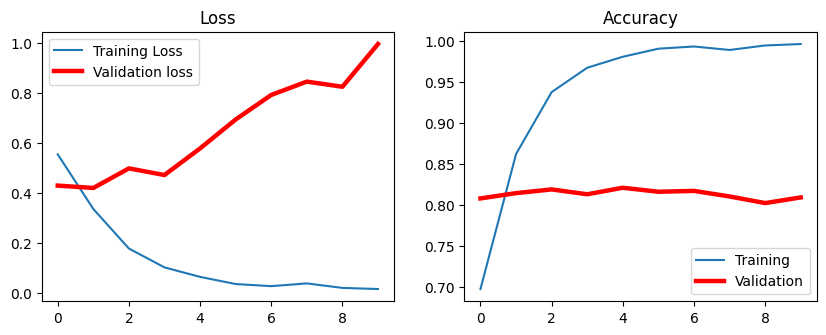

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()